### Dataset link: https://www.adcis.net/en/third-party/e-ophtha/

In [2]:
# Import libraries

import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from skimage import io
import numpy as np
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

ROOT_DIR = os.path.abspath("../")
DATASET_NAME = "e_optha_MA"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_NAME)
print(os.listdir(DATASET_PATH))


# Data dir
#-------------------
# Annotation_MA
# MA

['MA', 'healthy', 'Annotation_MA', 'e_ophta_MA.html']


In [55]:
image_paths = os.listdir("{}/MA/".format(DATASET_PATH))
mask_paths = os.listdir("{}/Annotation_MA/".format(DATASET_PATH))
image_paths[:3], mask_paths[:3]

(['E0019959', 'E0020194', 'E0019457'], ['E0019959', 'E0020194', 'E0019457'])

In [56]:
IMG_DIM = (512, 512) # H, W

images_rs = []
masks_rs = []

for img_path, mask_path in zip(image_paths[:],mask_paths[:]):
    # Images
    sub_images = os.listdir(os.path.join("{}/MA/".format(DATASET_PATH),img_path))
    sub_masks = os.listdir(os.path.join("{}/Annotation_MA/".format(DATASET_PATH),mask_path))
    
    sub_images.sort()
    sub_masks.sort()
    
    for img_file, mask_file in zip(sub_images, sub_masks):
        if img_file.endswith('.jpg') or img_file.endswith('.JPG'):
            img = io.imread('{}/MA/{}/{}'.format(DATASET_PATH, img_path, img_file))
            img = resize(img, IMG_DIM, mode='constant')
            images_rs.append(img)
        if mask_file.endswith('.png'):
            mask = io.imread('{}/Annotation_MA/{}/{}'.format(DATASET_PATH, mask_path, mask_file))
            mask = np.expand_dims(resize(mask, IMG_DIM).round(), axis=-1)
            masks_rs.append(mask)
        print(img_file, mask_file)
            
    #img = None
    #mask = None
        
images_rs = np.array(images_rs)
masks_rs = np.array(masks_rs)
images_rs.shape, masks_rs.shape

C0032812.jpg C0032812.png
C0032814.jpg C0032814.png
C0032817.jpg C0032817.png
C0006326.jpg C0006326.png
C0001273.jpg C0001273.png
C0001274.jpg C0001274.png
C0001275.jpg C0001275.png
C0001276.jpg C0001276.png
DS000FMH.JPG DS000FMH.png
C0019916.jpg C0019916.png
C0004246.jpg C0004246.png
C0004249.jpg C0004249.png
C0014726.jpg C0014726.png
C0014727.jpg C0014727.png
C0014728.jpg C0014728.png
C0014729.jpg C0014729.png
C0022011.jpg C0022011.png
C0001365.jpg C0001365.png
DS000DGS.JPG DS000DGS.png
Thumbs.db Thumbs.db
C0001883.jpg C0001883.png
C0001884.jpg C0001884.png
C0001885.jpg C0001885.png
C0001886.jpg C0001886.png
DS000DPJ.JPG DS000DPJ.png
DS000DPL.JPG DS000DPL.png
C0014790.jpg C0014790.png
C0014793.jpg C0014793.png
DS000FGD.JPG DS000FGD.png
DS000FGE.JPG DS000FGE.png
DS000FGF.JPG DS000FGF.png
C0007331.jpg C0007331.png
C0007333.jpg C0007333.png
DS000N9X.JPG DS000N9X.png
DS000N9Y.JPG DS000N9Y.png
DS000N9Z.JPG DS000N9Z.png
DS000NA1.JPG DS000NA1.png
C0019839.jpg C0019839.png
C0019840.jpg C0019

((148, 512, 512, 3), (148, 512, 512, 1))

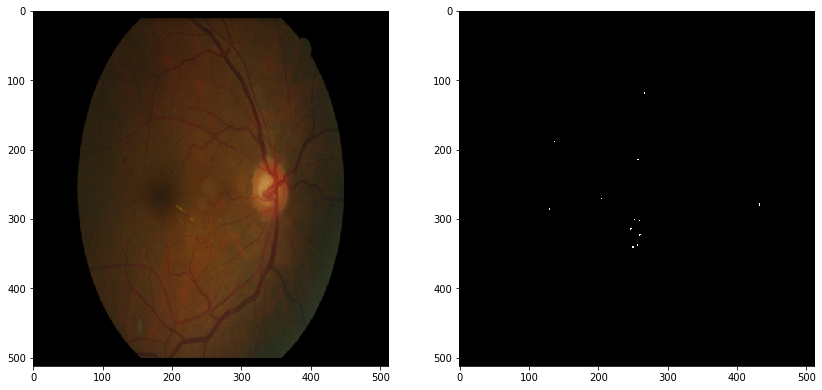

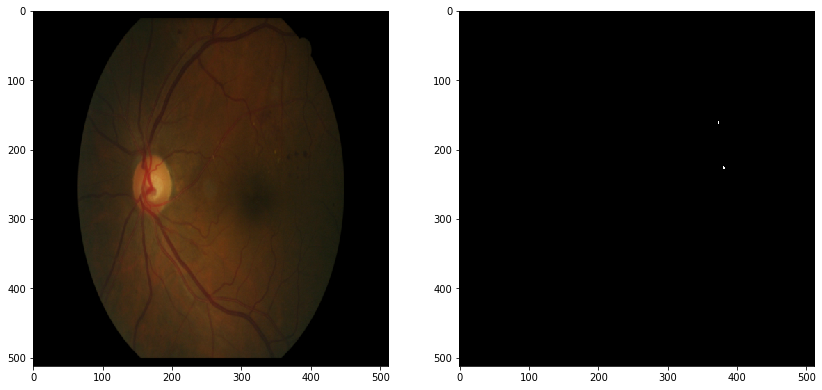

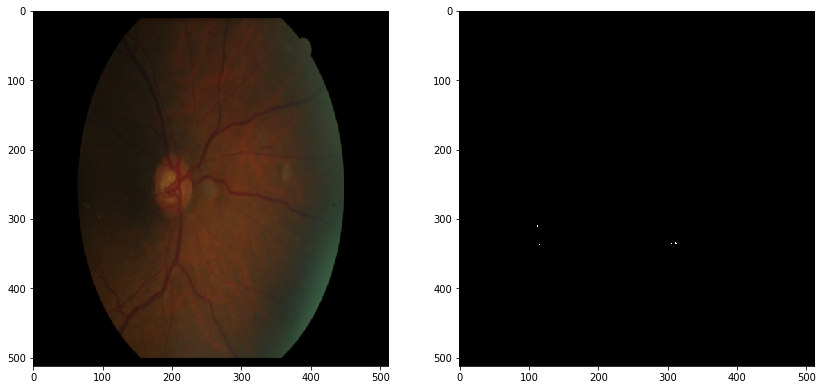

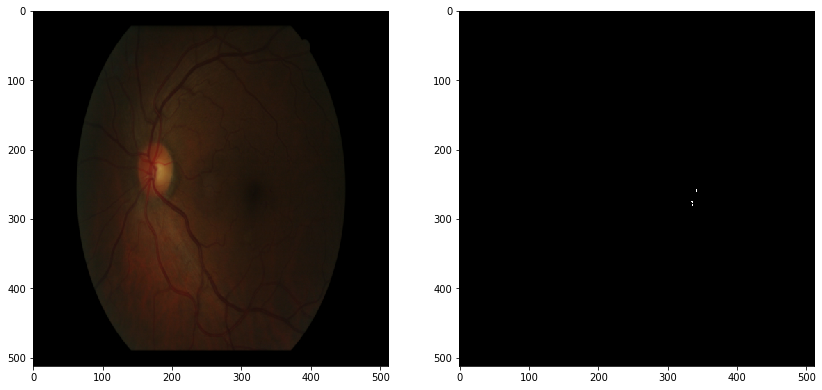

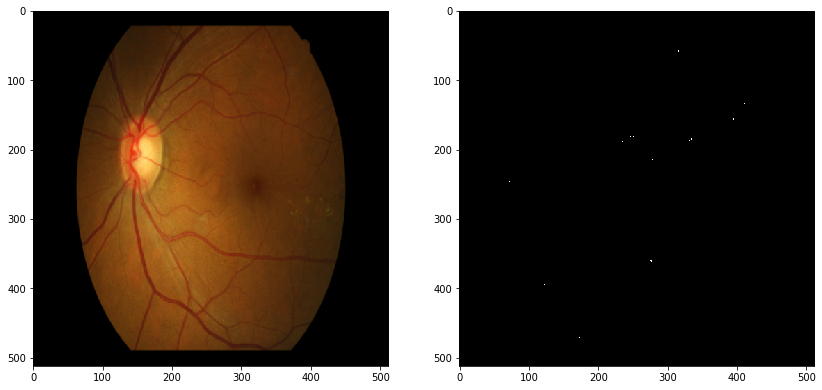

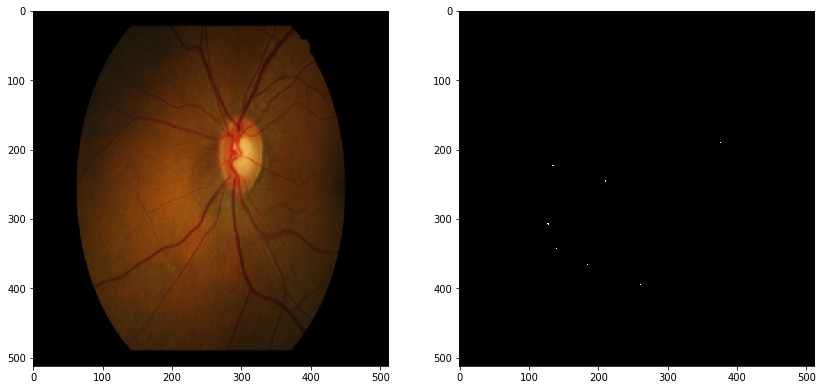

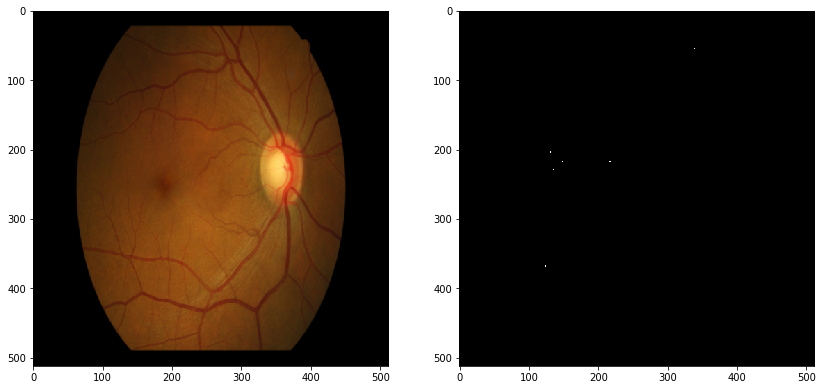

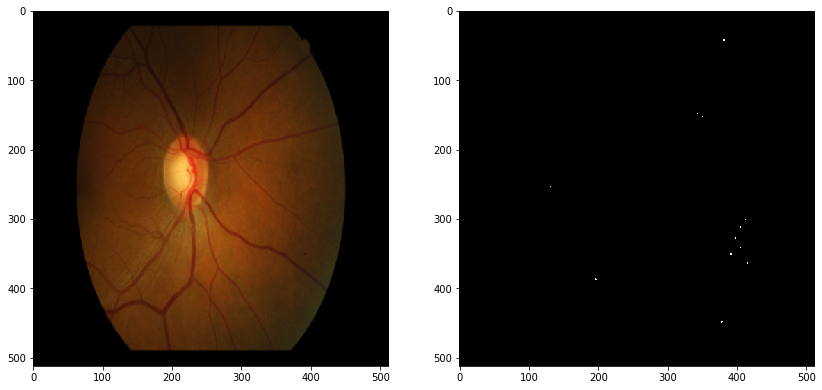

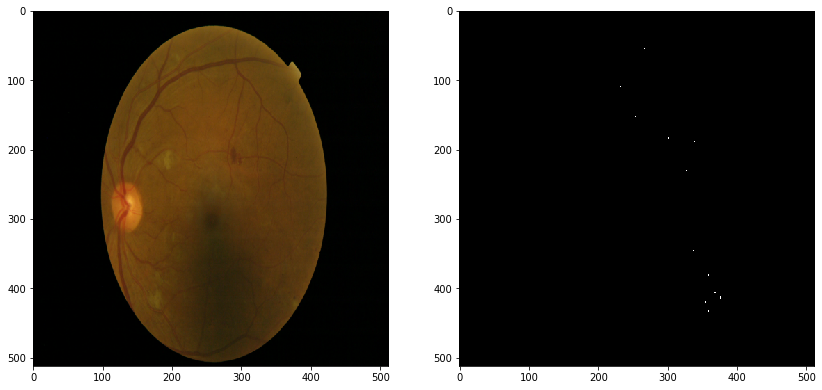

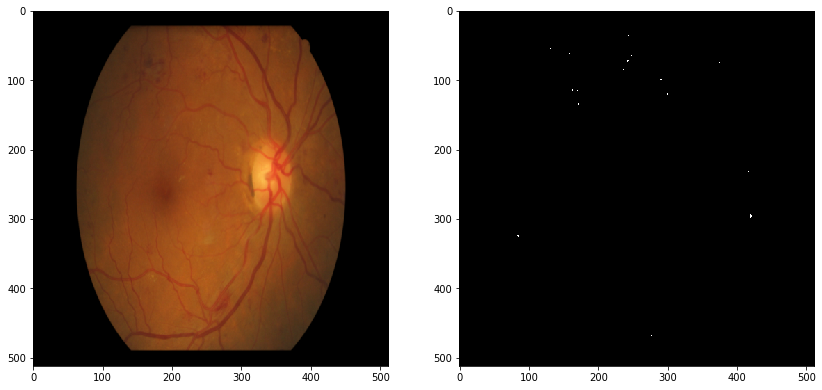

In [57]:
for img, mask in zip(images_rs[:10], masks_rs[:10]):
    
    mask = np.squeeze(mask, axis=-1) # change to H, W
    
    
    fig,_ = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
    fig.axes[0].imshow(img)
    fig.axes[1].imshow(mask, cmap='gray')
    plt.show()

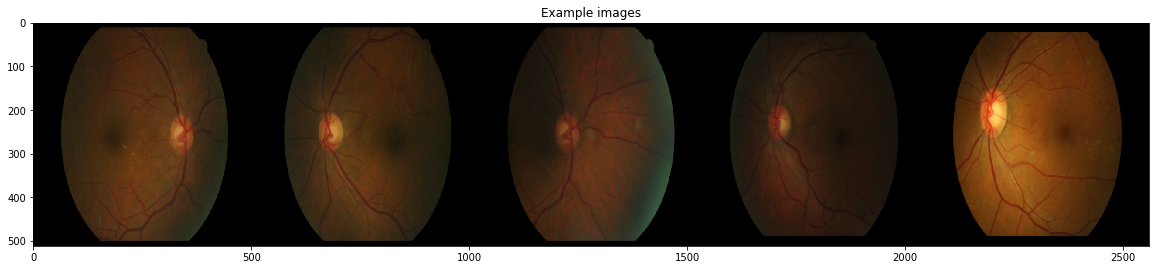

In [58]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.title("Example images")
plt.figsize=(14,12)
plt.imshow(np.concatenate(images_rs[:5].transpose((0,1,2,3)),axis=1), interpolation='none')

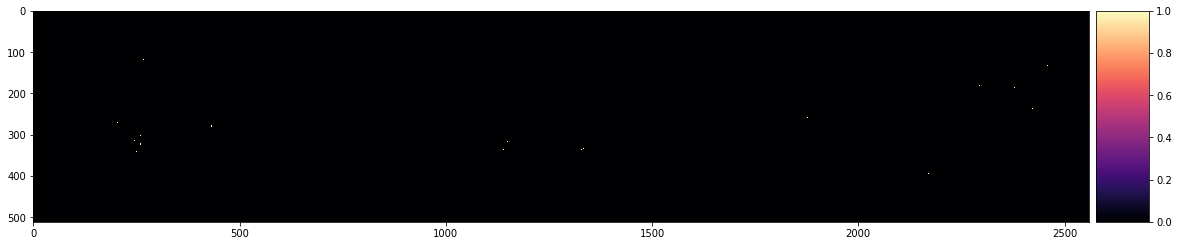

In [59]:
fig = plt.figure(1, figsize=(20, 5))
ax = plt.gca()
im = ax.imshow(np.concatenate(masks_rs[:5,:,:,0],axis=1), cmap='magma', interpolation='none') # cmap='bwr'
divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)

In [60]:
from skimage.segmentation import mark_boundaries, find_boundaries

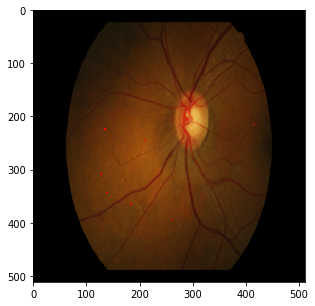

In [61]:
ct = 5
edges_pz = mark_boundaries(images_rs[ct], masks_rs[ct].squeeze().astype(np.int),color=(1,0,0), mode='thin')
plt.imshow(edges_pz)

In [62]:
images_rs.shape, masks_rs.shape

((148, 512, 512, 3), (148, 512, 512, 1))

In [63]:
np.save("{}/EOPTHA_MA_images.npy".format(DATASET_PATH), images_rs)
np.save("{}/EOPTHA_MA_mask.npy".format(DATASET_PATH), masks_rs)